In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KDTree
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
random_seed = 10
plt.rcParams.update({'font.size': 22})

def data_extraction(data_path, train_rate=None):
    data = pd.read_csv(data_path)
    data.drop(columns=['Name'], inplace=True)
    feature = data.keys()[:-1]
    X = data.to_numpy(dtype='float64')
    y = X[:, -1]
    X = X[:, :-1]
    if train_rate:
        X, _X, y, _y = train_test_split(X, y, train_size=train_rate, random_state=random_seed)
    return X, y

def result(truth, prediction):
    thresholds = [0.1, 0.05, 0.01]
    error = prediction - truth
    MSE = np.sum(np.power(error, 2)) / error.shape[0]
    for threshold in thresholds:
        print(f'Accuracy under the threshold {threshold}: {len(truth[abs(truth - prediction) <= threshold]) / len(truth) * 100}')
    print(f'RMSE: {np.sqrt(MSE)}')
    compare = [truth, prediction]
    compare = np.array(compare)
    compare = compare.transpose()
    compare.sort(axis=0)
    x = list(range(len(compare)))
    Tplot = plt.scatter(x, compare[:, 0], s=2)
    Pplot = plt.scatter(x, compare[:, 1], s=2)
    plt.legend(handles=[Pplot, Tplot], labels=['y_pred', 'y_truth'])
    plt.show()

def algorithm(X_train, y_train, alg, train_data_type):
    global all_result
    global X_test, y_test
    prediction = None
    if alg != 'kdtree':
        model_list = {
            'linear': LinearRegression(),
            'mlp': MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10), 
                                learning_rate_init=5e-6,
                                batch_size=len(X_train) // 10,
                                random_state=random_seed, 
                                max_iter=5000),
            'svr': SVR(kernel='poly', degree=20, C=8.5),
        }
        supervised_model = model_list[alg]
        supervised_model.fit(X_train, y_train)
        prediction = supervised_model.predict(X_test)
        print(f'Score (training): {supervised_model.score(X_train, y_train) * 100}')
        print(f'Score (testing): {supervised_model.score(X_test, y_test) * 100}')
        print(f'Cross-validation: {cross_val_score(supervised_model, X_train, y_train, cv=5)}')
    else:
        unsupervised_model = KDTree(X_train)
        neighbor = list(int(ele[0]) for ele in unsupervised_model.query(X_test, return_distance=False))
        prediction = y_train[neighbor]
    
    result_label = alg + '_' + train_data_type
    all_result[result_label] = prediction
    result(y_test, prediction)

def visualize_experiment(train_data_type=None, algorithm_type=None):
    global all_result
    if train_data_type:
        result_labels = ['ground_truth', 'linear_', 'svr_', 'mlp_', 'kdtree_']
        for i in range(1, len(result_labels)):
            result_labels[i] += train_data_type
    else:
        result_labels = ['ground_truth', '_complete', '_filtered', '_hundred', '_thousand']
        for i in range(1, len(result_labels)):
            result_labels[i] = algorithm_type + result_labels[i]
            
    handle = [all_result[label] for label in result_labels]
    handle = np.array(handle)
    handle.sort(axis=1)
    x = list(range(handle.shape[1]))

    plt.figure(figsize=(12, 12))
    for i in range(handle.shape[0]):
        if result_labels[i] == 'ground_truth':
            plt.plot(x, handle[i], label=result_labels[i], linestyle='-', linewidth=5)
        else:
            plt.plot(x, handle[i], label=result_labels[i], linestyle='-.', linewidth=2)

    plt.legend()
    plt.show()

In [4]:

train_data_path = './dataset/train.csv'
test_data_path = './dataset/test.csv'
filtered_data_path = './dataset/filter_train_data.csv'
X_train, y_train = data_extraction(train_data_path)
X_train_hundred, y_train_hundred = data_extraction(train_data_path, train_rate=100 / len(X_train))
X_train_thousand, y_train_thousand = data_extraction(train_data_path, train_rate=1000 / len(X_train))

X_test, y_test = data_extraction(test_data_path)
X_filtered, y_filtered = data_extraction(filtered_data_path)

print(X_train_hundred.shape)
print(X_train_thousand.shape)
print(X_filtered.shape)
print(X_train.shape)

(100, 9)
(999, 9)
(1088, 9)
(1939, 9)


In [5]:
all_result = {}
all_result['ground_truth'] = y_test


## Linear Regression

Score (training): 57.18232632118148
Score (testing): 56.324254327592996
Cross-validation: [0.44197917 0.34278367 0.51182375 0.54635703 0.60812559]
Accuracy under the threshold 0.1: 43.04635761589404
Accuracy under the threshold 0.05: 23.841059602649008
Accuracy under the threshold 0.01: 7.28476821192053
RMSE: 0.20247625052633714


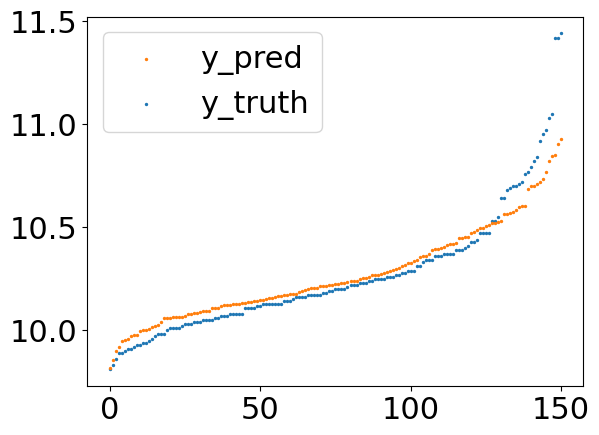

Score (training): 64.26347912315923
Score (testing): 60.55846000500529
Cross-validation: [0.51886731 0.59957541 0.58414895 0.60556962 0.65064903]
Accuracy under the threshold 0.1: 46.35761589403973
Accuracy under the threshold 0.05: 23.841059602649008
Accuracy under the threshold 0.01: 4.635761589403973
RMSE: 0.19241142568482214


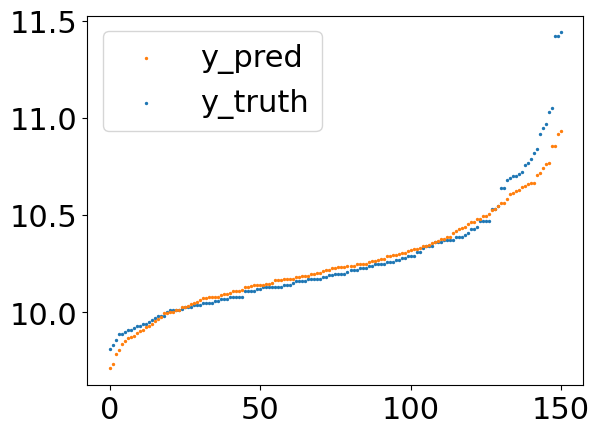

Score (training): 57.25217166434267
Score (testing): 52.52201912366681
Cross-validation: [ 0.7107804   0.4866474   0.26840345 -0.042181    0.52622219]
Accuracy under the threshold 0.1: 33.11258278145696
Accuracy under the threshold 0.05: 17.880794701986755
Accuracy under the threshold 0.01: 2.6490066225165565
RMSE: 0.21110574209385916


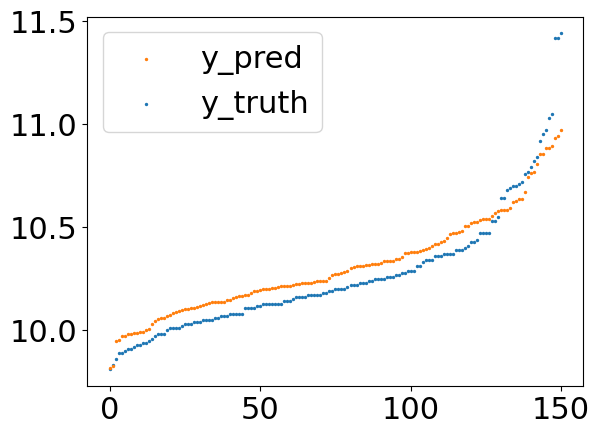

Score (training): 55.72006304713406
Score (testing): 57.524822454704115
Cross-validation: [0.50662173 0.54412789 0.48910332 0.61960809 0.52853809]
Accuracy under the threshold 0.1: 45.033112582781456
Accuracy under the threshold 0.05: 22.516556291390728
Accuracy under the threshold 0.01: 6.622516556291391
RMSE: 0.19967400417218512


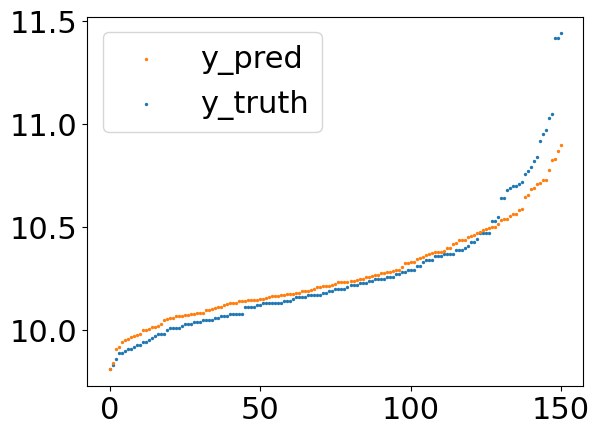

In [6]:
algorithm(X_train, y_train, 'linear', 'complete')
algorithm(X_filtered, y_filtered, 'linear', 'filtered')
algorithm(X_train_hundred, y_train_hundred, 'linear', 'hundred')
algorithm(X_train_thousand, y_train_thousand, 'linear', 'thousand')


## Neural Network

Score (training): -21.916539148472157
Score (testing): -130.56097838441298
Cross-validation: [-1.82312924 -0.38071064  0.12168123 -0.19429446 -0.81087639]
Accuracy under the threshold 0.1: 5.960264900662252
Accuracy under the threshold 0.05: 4.635761589403973
Accuracy under the threshold 0.01: 0.6622516556291391
RMSE: 0.46520762981179675


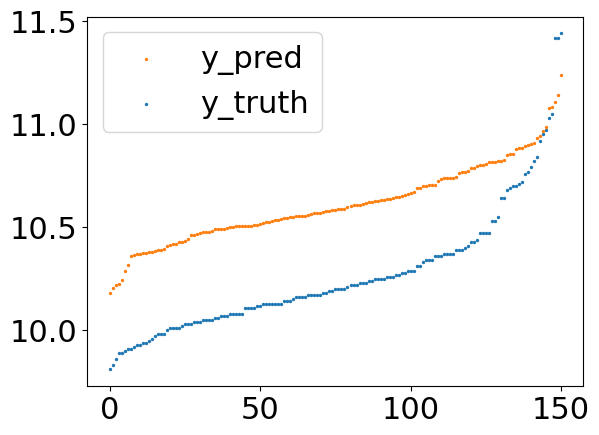

Score (training): -11.25378180651091
Score (testing): -188.27954702072768
Cross-validation: [-1.58879583 -0.15373593  0.2392502  -0.06045752 -0.61270077]
Accuracy under the threshold 0.1: 7.28476821192053
Accuracy under the threshold 0.05: 3.9735099337748347
Accuracy under the threshold 0.01: 0.6622516556291391
RMSE: 0.5201886130141955


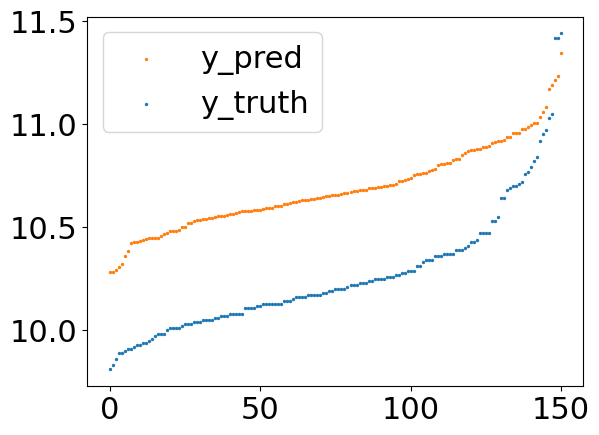

Score (training): -138.56485547971823
Score (testing): -327.82728873409377
Cross-validation: [-0.91401597 -3.31532969 -0.95754159 -3.63840174 -0.69459542]
Accuracy under the threshold 0.1: 6.622516556291391
Accuracy under the threshold 0.05: 4.635761589403973
Accuracy under the threshold 0.01: 1.3245033112582782
RMSE: 0.6337065075107826


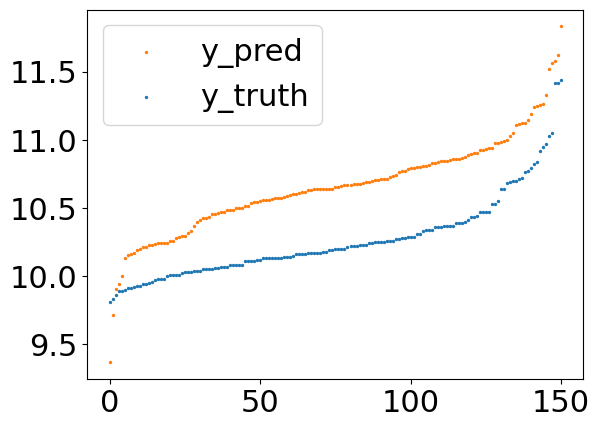

Score (training): -23.71214205206824
Score (testing): -124.26715701310678
Cross-validation: [-0.23988436 -0.11029973 -0.44599017 -0.16772328 -0.34264558]
Accuracy under the threshold 0.1: 7.9470198675496695
Accuracy under the threshold 0.05: 3.9735099337748347
Accuracy under the threshold 0.01: 0.6622516556291391
RMSE: 0.45881410911350606


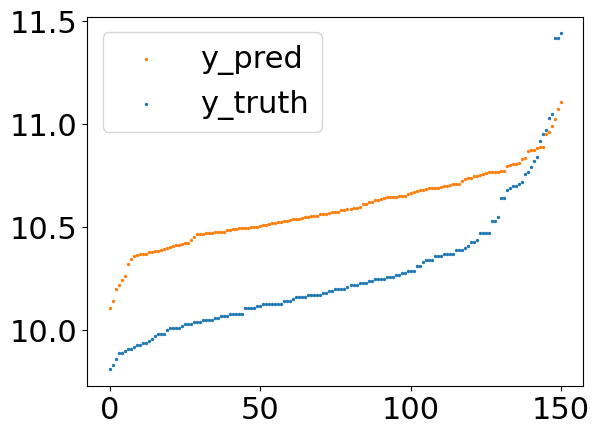

In [7]:
algorithm(X_train, y_train, 'mlp', 'complete')
algorithm(X_filtered, y_filtered, 'mlp', 'filtered')
algorithm(X_train_hundred, y_train_hundred, 'mlp', 'hundred')
algorithm(X_train_thousand, y_train_thousand, 'mlp', 'thousand')


## SVM

Score (training): 57.06579367402709
Score (testing): 53.13513612406023
Cross-validation: [0.40207415 0.39757473 0.49789355 0.53841495 0.63347533]
Accuracy under the threshold 0.1: 38.41059602649007
Accuracy under the threshold 0.05: 21.192052980132452
Accuracy under the threshold 0.01: 3.3112582781456954
RMSE: 0.20973823340234182


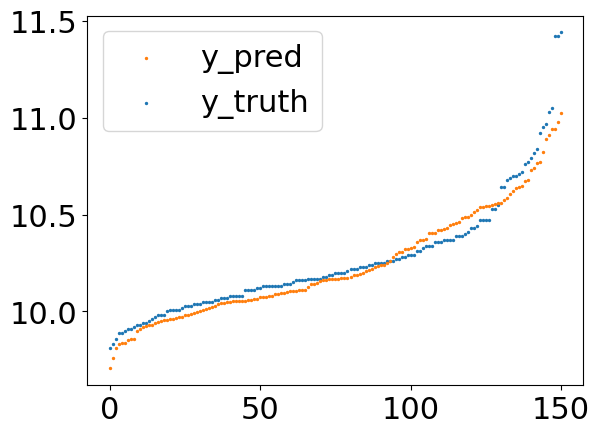

Score (training): 61.69088247952512
Score (testing): 50.73113067335906
Cross-validation: [0.40744442 0.53517448 0.56567171 0.60082056 0.64484063]
Accuracy under the threshold 0.1: 34.437086092715234
Accuracy under the threshold 0.05: 15.894039735099339
Accuracy under the threshold 0.01: 1.3245033112582782
RMSE: 0.21505038460312306


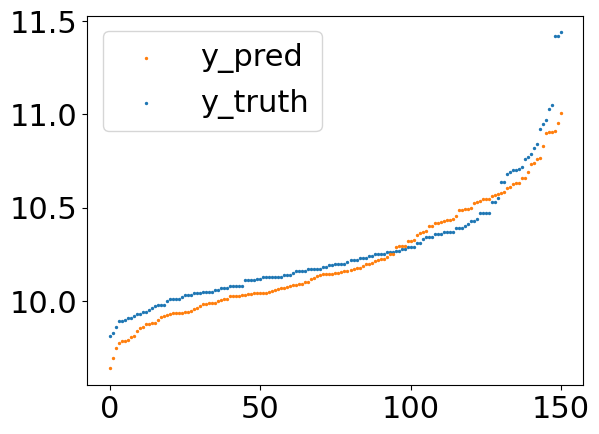

Score (training): 46.17777677380316
Score (testing): 26.889297829750593
Cross-validation: [ 0.65368544  0.53735043  0.08717744 -0.02863042  0.49118461]
Accuracy under the threshold 0.1: 30.4635761589404
Accuracy under the threshold 0.05: 13.90728476821192
Accuracy under the threshold 0.01: 4.635761589403973
RMSE: 0.2619656829444198


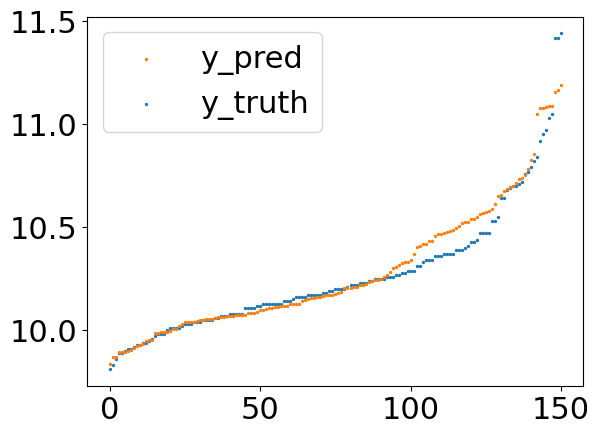

Score (training): 55.062619160098826
Score (testing): 51.76545796721346
Cross-validation: [0.51223435 0.5298956  0.5028094  0.58175011 0.52985759]
Accuracy under the threshold 0.1: 33.77483443708609
Accuracy under the threshold 0.05: 21.192052980132452
Accuracy under the threshold 0.01: 5.298013245033113
RMSE: 0.21278107831344606


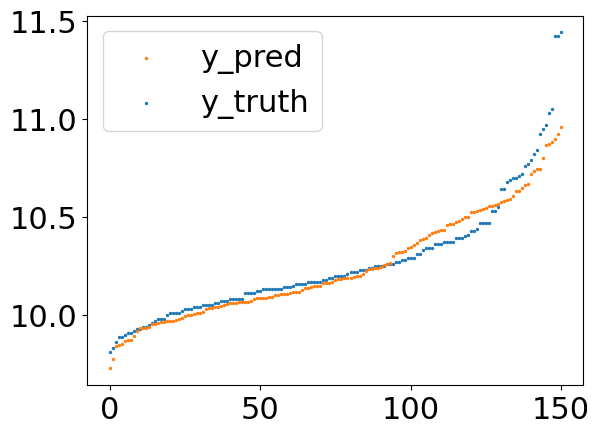

In [8]:
algorithm(X_train, y_train, 'svr', 'complete')
algorithm(X_filtered, y_filtered, 'svr', 'filtered')
algorithm(X_train_hundred, y_train_hundred, 'svr', 'hundred')
algorithm(X_train_thousand, y_train_thousand, 'svr', 'thousand')


## Nearest Neighbor Regression

Accuracy under the threshold 0.1: 26.490066225165563
Accuracy under the threshold 0.05: 14.56953642384106
Accuracy under the threshold 0.01: 4.635761589403973
RMSE: 0.3697869442070126


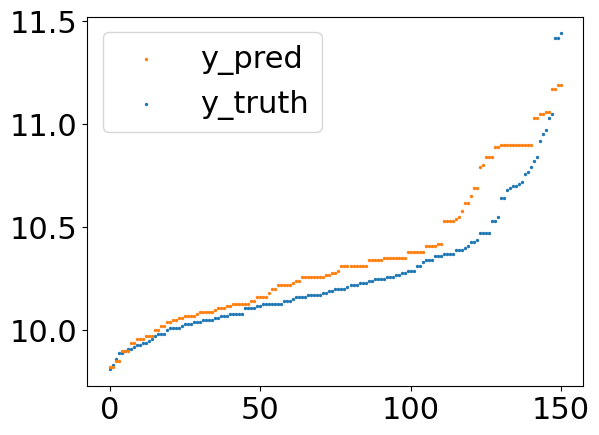

Accuracy under the threshold 0.1: 24.503311258278146
Accuracy under the threshold 0.05: 10.596026490066226
Accuracy under the threshold 0.01: 3.9735099337748347
RMSE: 0.36737749681432974


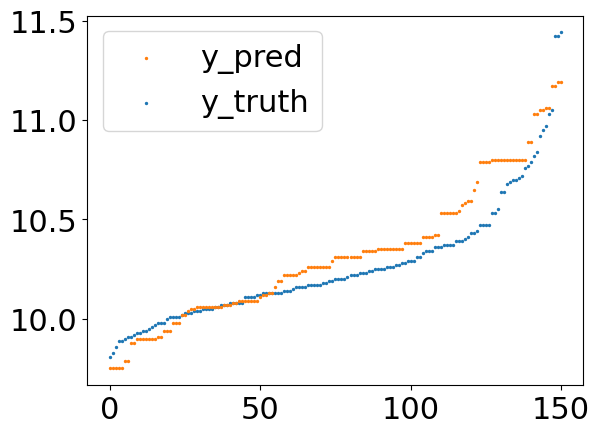

Accuracy under the threshold 0.1: 12.582781456953644
Accuracy under the threshold 0.05: 3.3112582781456954
Accuracy under the threshold 0.01: 0.0
RMSE: 0.4446510649221746


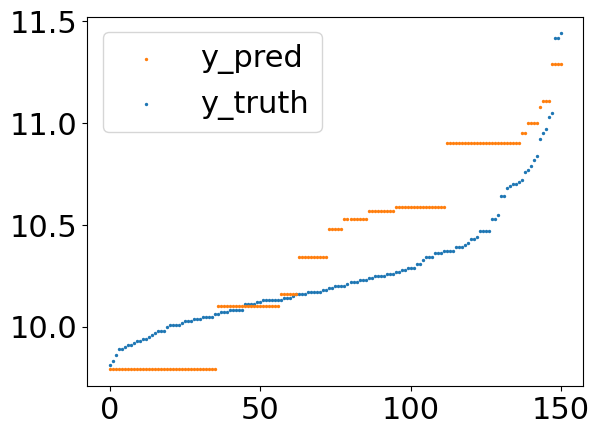

Accuracy under the threshold 0.1: 23.178807947019866
Accuracy under the threshold 0.05: 13.245033112582782
Accuracy under the threshold 0.01: 1.9867549668874174
RMSE: 0.38041977511429825


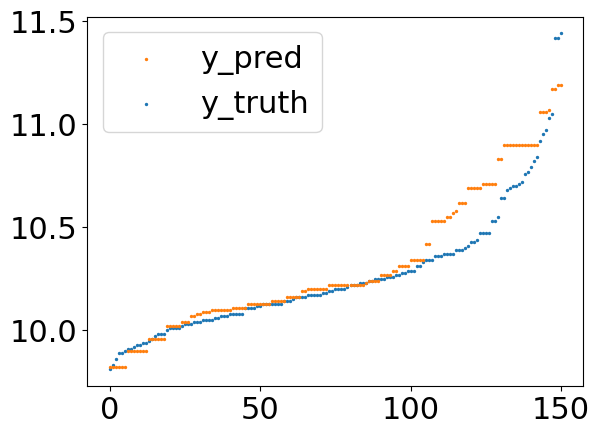

In [9]:
algorithm(X_train, y_train, 'kdtree', 'complete')
algorithm(X_filtered, y_filtered, 'kdtree', 'filtered')
algorithm(X_train_hundred, y_train_hundred, 'kdtree', 'hundred')
algorithm(X_train_thousand, y_train_thousand, 'kdtree', 'thousand')


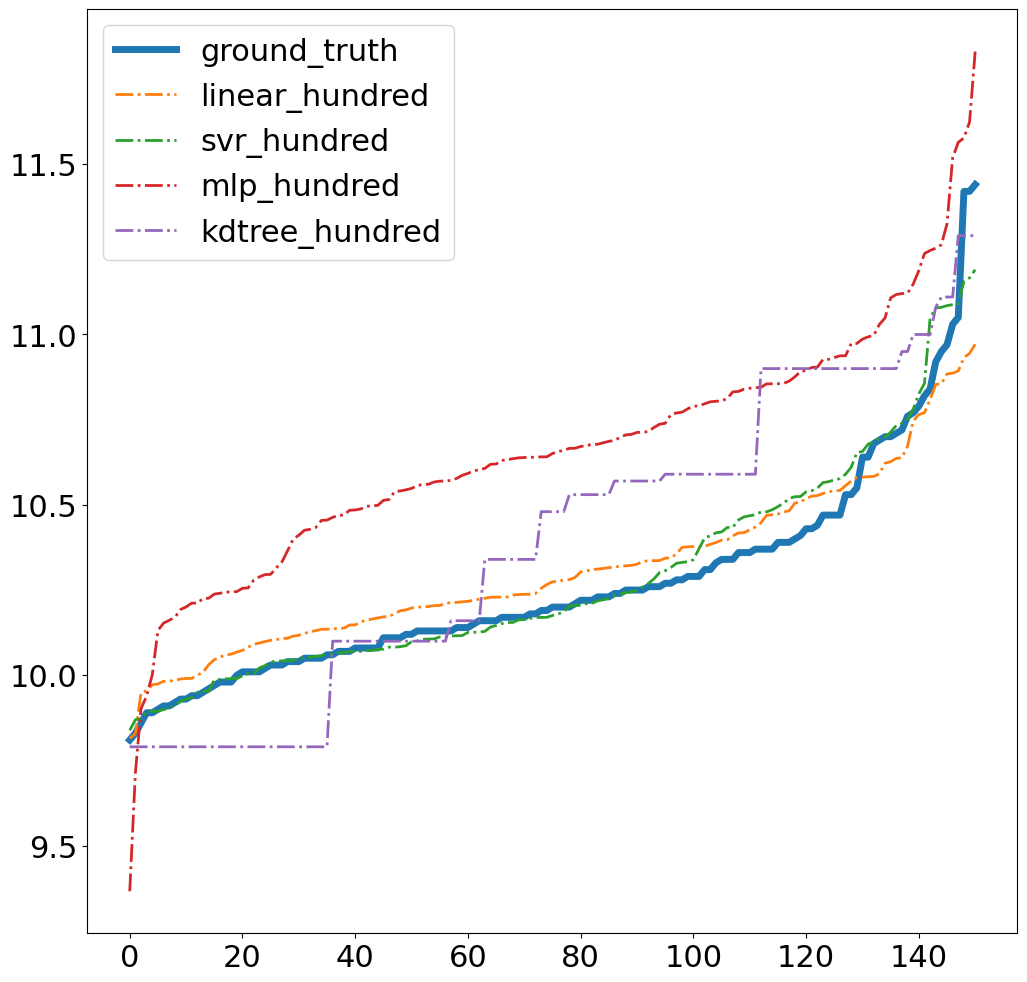

In [19]:
visualize_experiment(train_data_type='hundred')

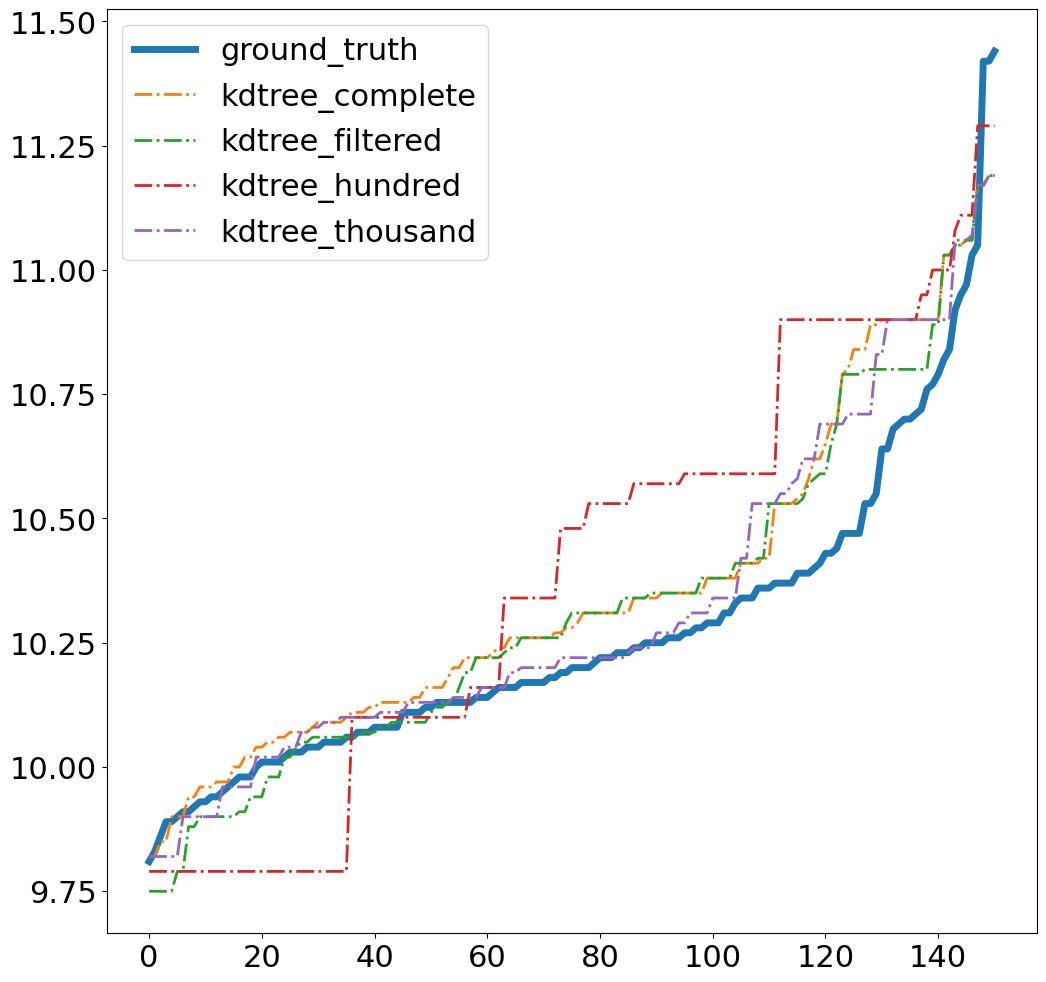

In [15]:
visualize_experiment(algorithm_type='kdtree')